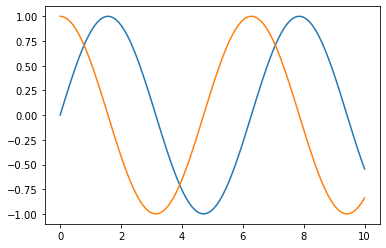

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

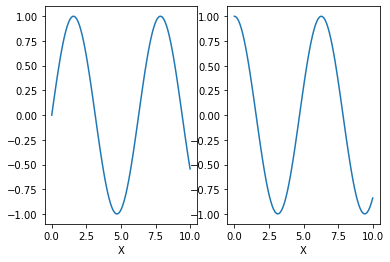

In [2]:
plt.figure(figsize = (6, 4))
plt.subplot(1, 2, 1) #(rows, columns, panels)
plt.plot(x, np.sin(x))
plt.xlabel('X')
#plt.ylabel('SinX')
plt.subplot(1, 2, 2)
plt.xlabel('X')
#plt.ylabel('cosX')
plt.plot(x, np.cos(x))

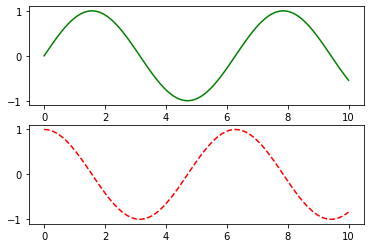

In [6]:
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x), '-g')
ax[1].plot(x, np.cos(x), '--r');

(-1.5, 1.5)

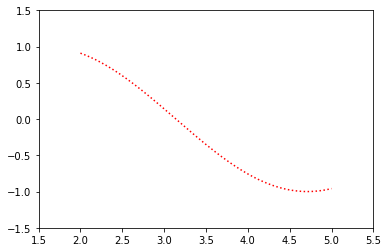

In [12]:
x = np.linspace(2, 5, 200)
plt.plot(x, np.sin(x), ':r')
plt.xlim(1.5, 5.5)
plt.ylim(-1.5, 1.5)

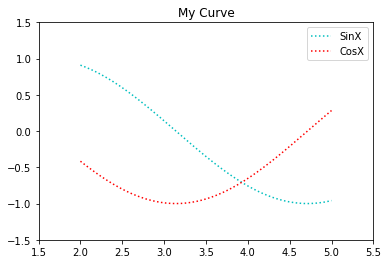

In [24]:
x = np.linspace(2, 5, 200)
plt.plot(x, np.sin(x), ':c', label = "SinX")
plt.plot(x, np.cos(x), ':r', label = "CosX")
plt.axis([1.5, 5.5, -1.5, 1.5])
plt.title("My Curve")
plt.legend()

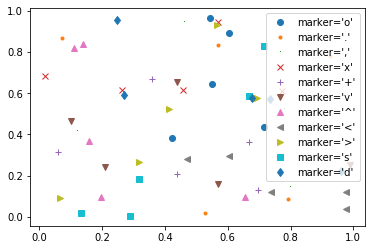

In [28]:
##Scatter plot
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
plt.legend()

[1.5, 5.5, -1.5, 1.5]

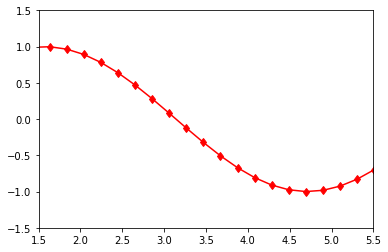

In [32]:
x = np.linspace(0, 10, 50)
plt.plot(x, np.sin(x), '-d', color = "red");
plt.axis([1.5, 5.5, -1.5, 1.5])

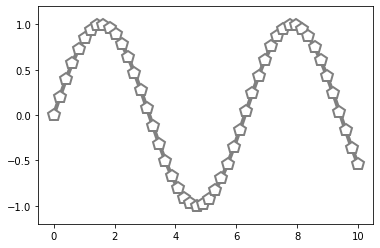

In [34]:
plt.plot(x, np.sin(x), '-p', color='gray',
         markersize=12, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);


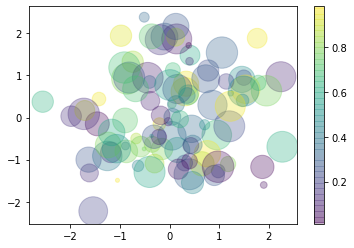

In [41]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

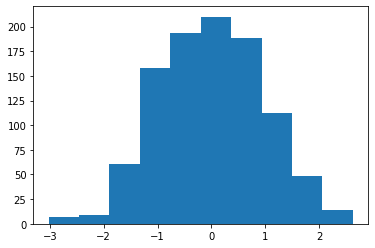

In [45]:
data = np.random.randn(1000)
plt.hist(data);

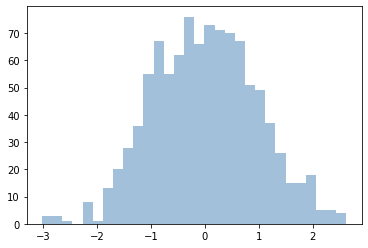

In [47]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

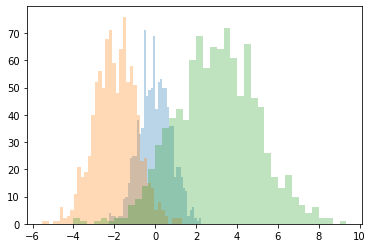

In [49]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [54]:
births = pd.read_csv('C:/Users/PC/Desktop/new desktop/Births.txt')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [56]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 684.8+ KB


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


[Text(0, 0.5, 'average daily births'),
 Text(0.5, 1.0, 'USA births by day of year (1969-1988)')]

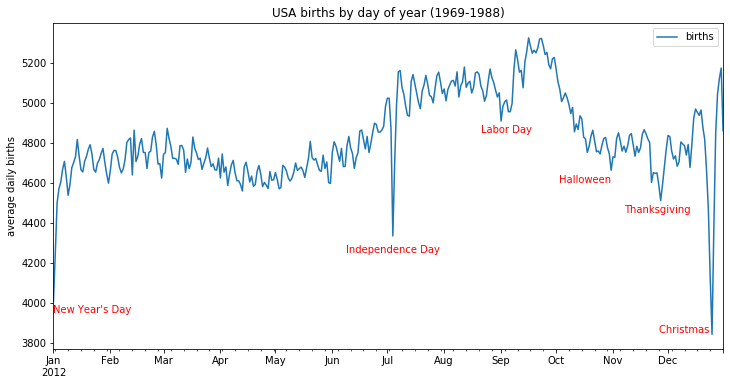

In [68]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 6))
births_by_date.plot(ax=ax);
style = dict(size=10, color='red')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')
#births_by_date.unstack()

[Text(0, 0.5, 'average daily births'),
 Text(0.5, 1.0, 'USA births by day of year (1969-1988)')]

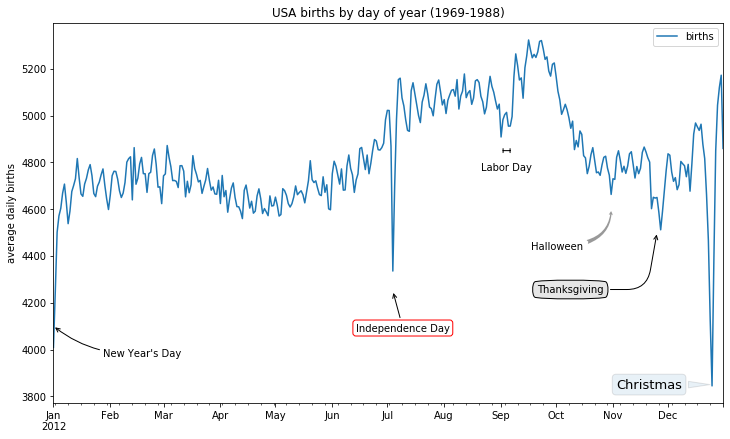

In [76]:
fig, ax = plt.subplots(figsize=(12, 7))
births_by_date.plot(ax=ax)
# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="red"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
             xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
             xytext=(-80, -40), textcoords='offset points',
             arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",
                             connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="angle,angleA=0,angleB=80,rad=20"))
ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

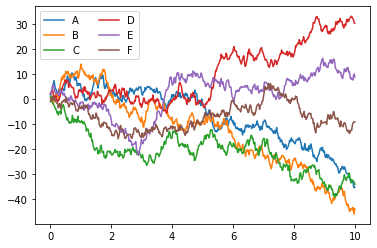

In [87]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

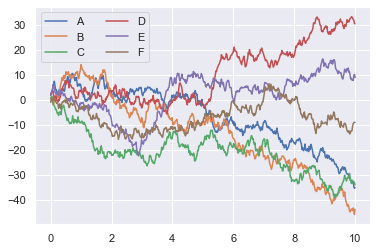

In [90]:
##plot using seaborn
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

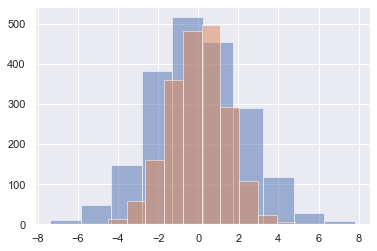

In [93]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], alpha=0.5)

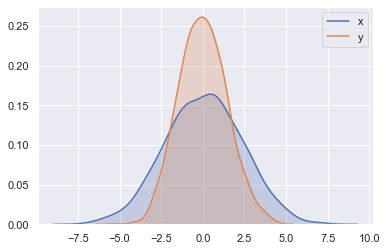

In [97]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

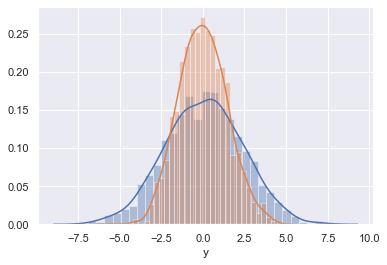

In [101]:
for col in 'xy':
    sns.distplot(data[col])

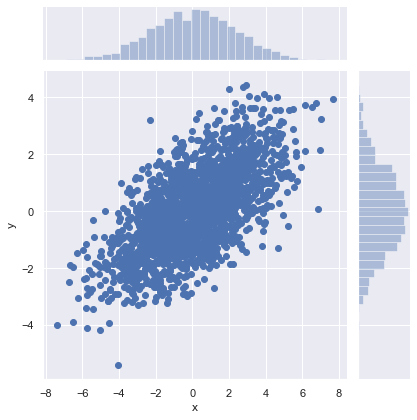

In [107]:
sns.jointplot('x', 'y', data, kind = 'scatter')

In [110]:
#load the iris dataset from the internet
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


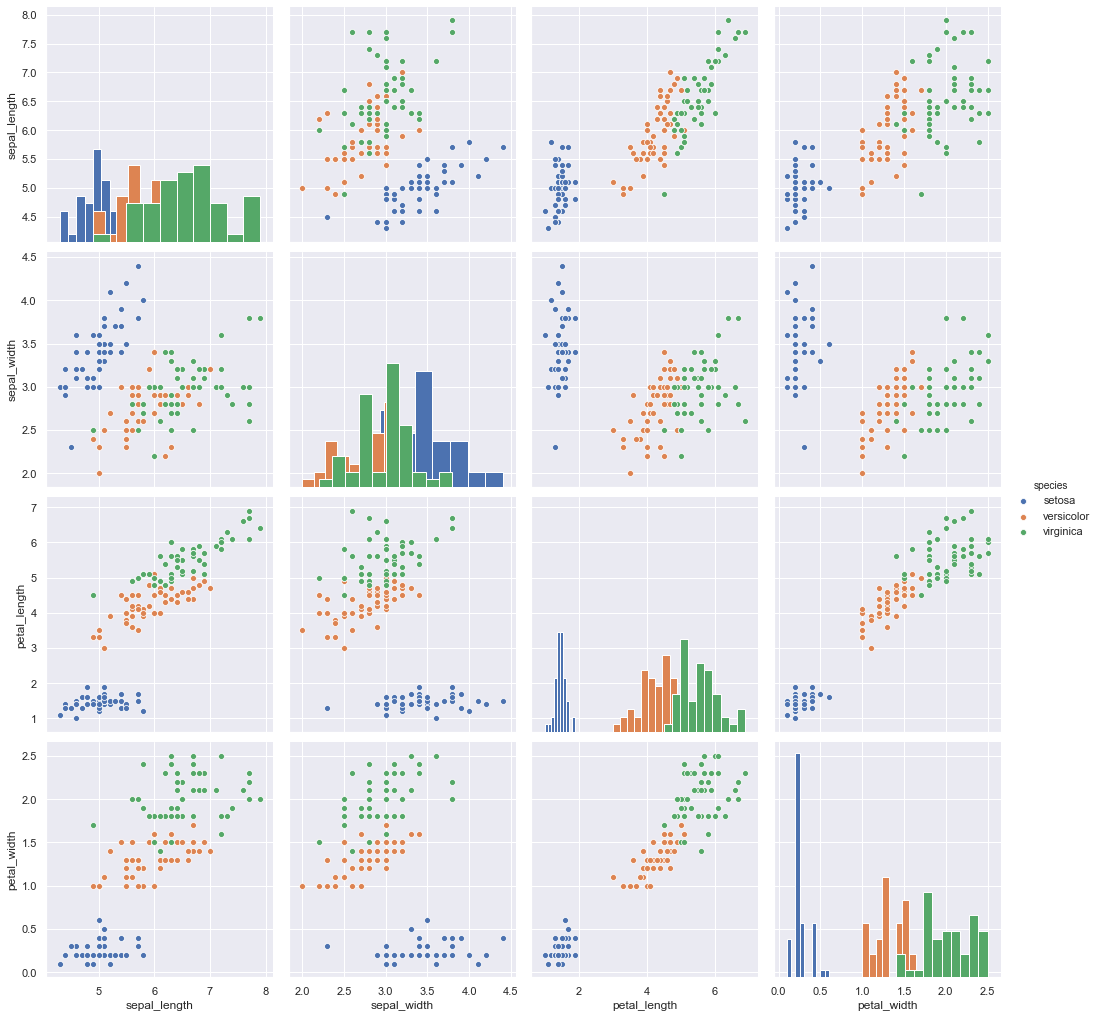

In [157]:
sns.pairplot(iris, hue= 'species', diag_kind = 'hist', height
             = 3.5)

In [121]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


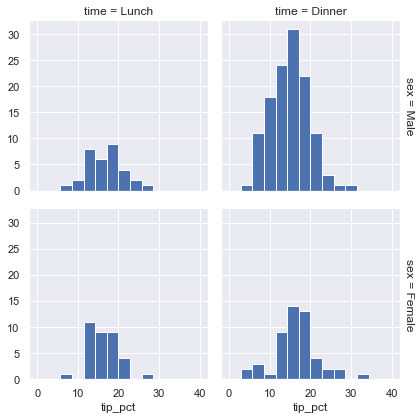

In [125]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));
tips.head()

In [126]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

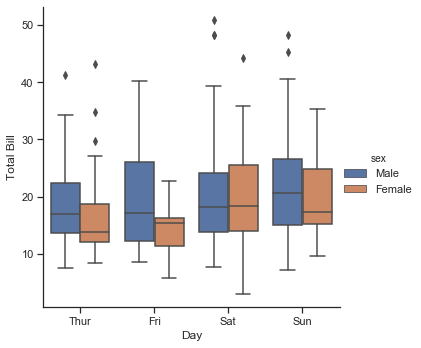

In [136]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");
#the box represents 50% of the data

In [138]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [145]:
planets['year'].unique().sort()
print(planets)

               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]


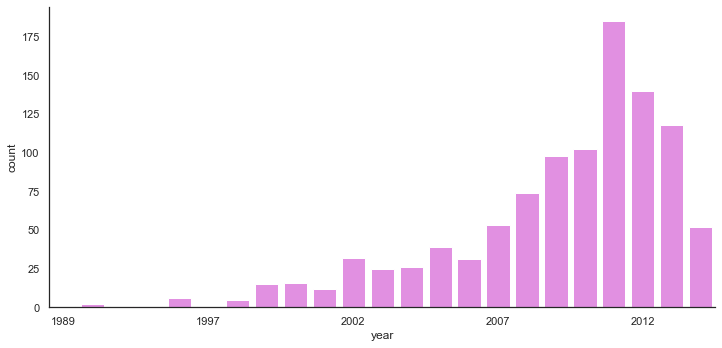

In [151]:
with sns.axes_style('white'):
     g = sns.catplot("year", data=planets, aspect=2,
                     kind="count", color='violet')
g.set_xticklabels(step=5)
#aspect determines the plot size

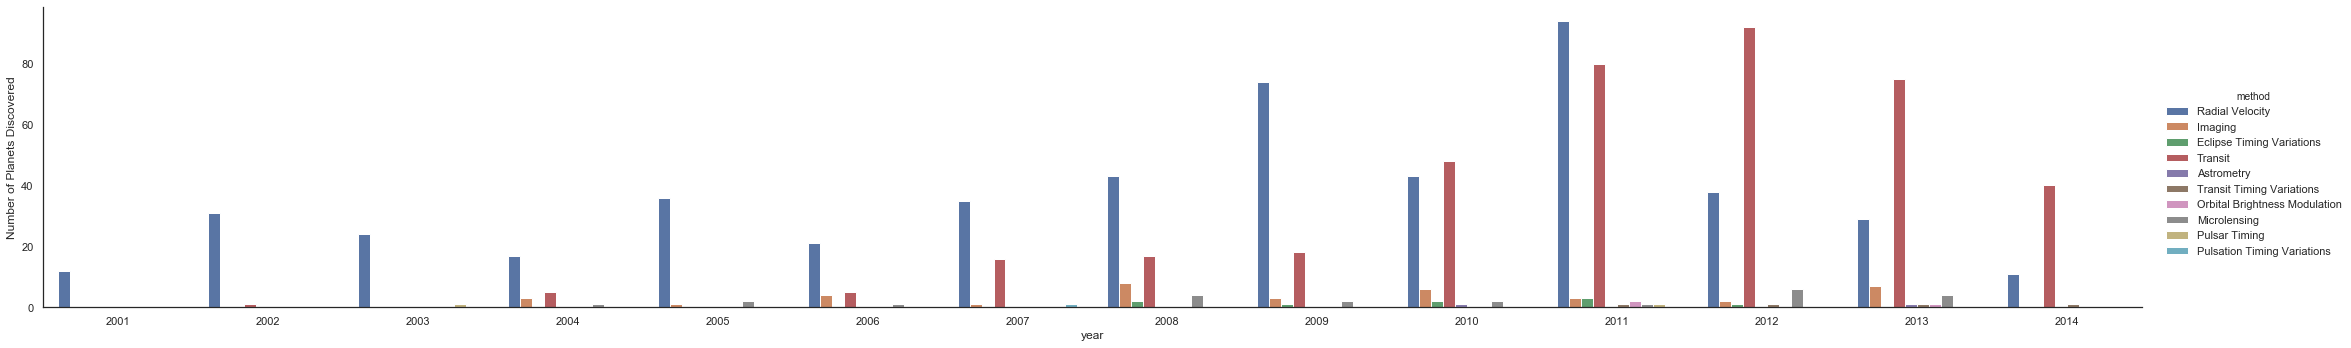

In [156]:
with sns.axes_style('white'):
        g = sns.factorplot("year", data=planets, aspect=6.0, kind='count',
                            hue='method', order=range(2001, 2015))
g.set_ylabels('Number of Planets Discovered')

In [160]:
marathon = pd.read_csv('C:/Users/PC/Desktop/new desktop/marathon-data-master/marathon-data.csv')
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [161]:
marathon.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [3]:
#this is the line of problem but check page 323 of the textbook i sent to your whatsapp. we are trying to convert to timedelta
import pandas as pd
from datetime import time

# def convert_time(s):
#     h, m, s = map(int, s.split(':'))
#     return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

In [6]:
data = pd.read_csv('marathon-data.csv')

In [19]:
def convert_time(s):
    return pd.to_timedelta(s, unit = 's')

In [20]:
data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [22]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [21]:
# from datetime import time as t
# def convert_time(s): 
#     h, m, s = map(int, s.split(':'))
#     return strftime("%H:%M:%S")
# marathon = pd.read_csv('C:/Users/PC/Desktop/new desktop/marathon-data-master/marathon-data.csv',
#            converters={'split':convert_time, 'final':convert_time})
# marathon.head()

In [ ]:
# def strptime():
#     convert_time.strftime("%H:%M:%S")
# def convert_time(s):
#     H, M, S = map(int, s.split(':'))
#     return pd.datetools.timedelta(hours=H, minutes=M, seconds=S)
    
# marathon = pd.read_csv('C:/Users/PC/Desktop/new desktop/marathon-data-master/marathon-data.csv')
# #marathon.head()
# marathon.dtypes